# Importations du fichier

In [472]:
import pandas as pd

In [473]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [474]:
#!rm -rf Walmart_ML_Project
!git clone https://github.com/ACombey/Walmart_ML_Project.git
%cd Walmart_ML_Project


Cloning into 'Walmart_ML_Project'...
remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 9 (delta 3), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (9/9), 306.39 KiB | 6.01 MiB/s, done.
Resolving deltas: 100% (3/3), done.
/content/Walmart_ML_Project/Walmart_ML_Project/Walmart_ML_Project/Walmart_ML_Project/Walmart_ML_Project/Walmart_ML_Project/Walmart_ML_Project/Walmart_ML_Project/Walmart_ML_Project/Walmart_ML_Project/Walmart_ML_Project/Walmart_ML_Project/Walmart_ML_Project


# Exploration du dataset

In [475]:
import pandas as pd
df = pd.read_csv("Walmart_Store_sales.csv")
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,6.0,18-02-2011,1572117.54,NaN,59.61,3.045,214.777523,6.858
1,13.0,25-03-2011,1807545.43,0.0,42.38,3.435,128.616064,7.470
2,17.0,27-07-2012,NaN,0.0,NaN,NaN,130.719581,5.936
3,11.0,NaN,1244390.03,0.0,84.57,NaN,214.556497,7.346
4,6.0,28-05-2010,1644470.66,0.0,78.89,2.759,212.412888,7.092


In [476]:
df.describe(include='all')

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,150.000000,132,1.360000e+02,138.000000,132.000000,136.000000,138.000000,135.000000
unique,NaN,85,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,19-10-2012,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN
mean,9.866667,NaN,1.249536e+06,0.079710,61.398106,3.320853,179.898509,7.598430
std,6.231191,NaN,6.474630e+05,0.271831,18.378901,0.478149,40.274956,1.577173
min,1.000000,NaN,2.689290e+05,0.000000,18.790000,2.514000,126.111903,5.143000
25%,4.000000,NaN,6.050757e+05,0.000000,45.587500,2.852250,131.970831,6.597500
50%,9.000000,NaN,1.261424e+06,0.000000,62.985000,3.451000,197.908893,7.470000
75%,15.750000,NaN,1.806386e+06,0.000000,76.345000,3.706250,214.934616,8.150000


In [477]:
display(df.dtypes)

,0
Store,float64
Date,object
Weekly_Sales,float64
Holiday_Flag,float64
Temperature,float64
Fuel_Price,float64
CPI,float64
Unemployment,float64


In [478]:
taille_initiale = df.shape
print("Nombre de lignes:", taille_initiale[0])
print("Nombre de colonnes:", taille_initiale[1])

Nombre de lignes: 150
Nombre de colonnes: 8


# Pre-traitement des colonnes

In [479]:
# ------------ Colonne Store ---------------- #
# Suppression de la colonne

# Visualisation des variables
print("Exemple de valeurs:" , df['Store'].unique())
# Nb valeurs uniques
print("Nb de valeurs uniques:", len(df['Store'].unique()))
# Nb valeurs totales
print("Nb de valeurs totales:", df['Store'].count())
# Nb valeurs nulles
print("Nb de valeurs nulles:", df['Store'].isnull().sum())

Exemple de valeurs: [ 6. 13. 17. 11.  4. 15. 20. 14.  3.  8. 18.  7.  1.  2.  5. 19. 16. 12.
  9. 10.]
Nb de valeurs uniques: 20
Nb de valeurs totales: 150
Nb de valeurs nulles: 0


In [480]:
# ------------ Colonne Weekly_Sales ---------------- #
# Suppression des valeurs manquantes (évite le data leakage)

# Nombre de valeurs manquantes
val_manq = df['Weekly_Sales'].isnull().sum()
print("Nombre de valeurs manquantes =", val_manq)

pourcentage = (val_manq / df.shape[0]) * 100
print(f"Ratio de valeurs manquantes : {pourcentage:.2f} %")

# Suppression des lignes avec Weekly_Sales manquant
df = df.dropna(subset=['Weekly_Sales']).reset_index(drop=True)

# Vérification après suppression
val_manq_apres = df['Weekly_Sales'].isnull().sum()
print("Nombre de valeurs manquantes après suppression =", val_manq_apres)

print(f"Nombre de lignes après traitement : {df.shape[0]}")


Nombre de valeurs manquantes = 14
Ratio de valeurs manquantes : 9.33 %
Nombre de valeurs manquantes après suppression = 0
Nombre de lignes après traitement : 136


In [481]:
# ------------ Temperature', 'Fuel_Price', 'CPI', 'Unemployment ---------------- #
#Detection des outliers
cols = ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment']

# Copier le DataFrame pour filtrer (optionnel)
df_clean = df.copy()

for col in cols:
    mean = df_clean[col].mean()
    std = df_clean[col].std()
    lower = mean - 3 * std
    upper = mean + 3 * std

    # Garder les lignes où la valeur est dans [mean - 3*std, mean + 3*std]
    outliers = df_clean[(df_clean[col] < lower) | (df_clean[col] > upper)]

    print(f"Nombre d'outliers détectés pour {col} : {len(outliers)}")

Nombre d'outliers détectés pour Temperature : 0
Nombre d'outliers détectés pour Fuel_Price : 0
Nombre d'outliers détectés pour CPI : 0
Nombre d'outliers détectés pour Unemployment : 5


In [482]:
print("Nombre de Nan")
print(df.isna().sum())

# Modification des Nan selon strategie de la mediane
df['Temperature'] = df['Temperature'].fillna(df['Temperature'].median())
df['Fuel_Price'] = df['Fuel_Price'].fillna(df['Fuel_Price'].median())
df['CPI'] = df['CPI'].fillna(df['CPI'].median())
df.loc[:, 'Unemployment'] = df['Unemployment'].fillna(df['Unemployment'].median())

Nombre de Nan
Store            0
Date            18
Weekly_Sales     0
Holiday_Flag    11
Temperature     15
Fuel_Price      12
CPI             11
Unemployment    14
dtype: int64


In [483]:
# ------------'Unemployment' ---------------- #
col = 'Unemployment'
outliers_unemployment = df_clean[(df_clean[col] < lower) | (df_clean[col] > upper)]

print(f"Nombre d'outliers détectés pour {col} : {len(outliers)}")
print("Voici 5 outliers :")
print(outliers_unemployment[[col, "Store"]].head(5))

Nombre d'outliers détectés pour Unemployment : 5
Voici 5 outliers :
     Unemployment  Store
28         13.736   12.0
58         14.313   12.0
64         13.503   12.0
85         13.736   12.0
122        14.180   12.0


C'est 5 outliers appartenant a la meme zone geographique ne sont pas abberantes mais reflete un taux de chomage important localement (store 12)

In [484]:
# ------------ Colonne Date ---------------- #
# Traitement de la variable temporelle

# Conversion en datetime (force les valeurs invalides en NaT)
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Nombre de valeurs manquantes
val_manq = df['Date'].isnull().sum()
print("Nombre de valeurs nulles :", val_manq)

# Ratio de valeurs manquantes
pourcentage = (val_manq / df.shape[0]) * 100
print(f"Ratio de valeurs manquantes : {pourcentage:.2f} %")

# Choix : imputation par la date médiane (préserve la structure temporelle)
print("Choix : imputation par la date médiane")

# Calcul de la date médiane
date_mediane = df['Date'].median()
print("Date médiane utilisée pour l'imputation :", date_mediane)

# Imputation des valeurs manquantes
df['Date'] = df['Date'].fillna(date_mediane)

# Vérification après imputation
print("Nombre de valeurs nulles dans 'Date' après imputation :", df['Date'].isnull().sum())


Nombre de valeurs nulles : 18
Ratio de valeurs manquantes : 13.24 %
Choix : imputation par la date médiane
Date médiane utilisée pour l'imputation : 2011-04-29 00:00:00
Nombre de valeurs nulles dans 'Date' après imputation : 0


/tmp/ipython-input-1006476319.py:5: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


In [485]:
# ------------ Colonne Date (bis)---------------- #
#Conversion en format Datetime
#df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
df['Year'] = df['Date'].dt.year.astype('int16')
df['Month'] = df['Date'].dt.month.astype('int16')
df['Day'] = df['Date'].dt.day.astype('int16')
df['Weekday'] = df['Date'].dt.weekday.astype('int16')   # 0 = lundi, 6 = dimanche
df['WeekdayName'] = df['Date'].dt.day_name()
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day,Weekday,WeekdayName
0,6.0,2011-02-18,1572117.54,NaN,59.61,3.045,214.777523,6.858,2011,2,18,4,Friday
1,13.0,2011-03-25,1807545.43,0.0,42.38,3.435,128.616064,7.470,2011,3,25,4,Friday
2,11.0,2011-04-29,1244390.03,0.0,84.57,3.451,214.556497,7.346,2011,4,29,4,Friday
3,6.0,2010-05-28,1644470.66,0.0,78.89,2.759,212.412888,7.092,2010,5,28,4,Friday
4,4.0,2010-05-28,1857533.70,0.0,62.25,2.756,126.160226,7.896,2010,5,28,4,Friday


In [486]:
# ------------ Colonne Holiday_Flag ---------------- #
print("Valeur de 'Holiday_flag':",df['Holiday_Flag'].unique())
# Nb valeurs nulles
print("Nombre de valeurs nulles:", df['Holiday_Flag'].isnull().sum())
print("*****")
# Pour chaque date, calculer rechercher si elle n'est pas presente pour un autre magasin
holiday_by_date = df.groupby('Date')['Holiday_Flag'].mean()

# Fonction pour remplir Holiday_Flag manquant grace a un autre declaratif magasin
print("Imputation des tags grace aux declaratifs des autres magasin...")
def fill_holiday_flag(row):
    if pd.isna(row['Holiday_Flag']):
        return holiday_by_date.loc[row['Date']]
    else:
        return row['Holiday_Flag']

# Application de la fonction
df['Holiday_Flag'] = df.apply(fill_holiday_flag, axis=1)
print("...Done")
# Vérification
print("Nombre de valeurs nulles apres imputation auto:", df['Holiday_Flag'].isna().sum())  # Doit être 0 ou très proche


Valeur de 'Holiday_flag': [nan  0.  1.]
Nombre de valeurs nulles: 11
*****
Imputation des tags grace aux declaratifs des autres magasin...
...Done
Nombre de valeurs nulles apres imputation auto: 3


In [487]:
# Filtrer les lignes où Holiday_Flag est NaN
missing_holiday_flags = df[df['Holiday_Flag'].isna()]
print("Valeurs manquantes malgres Imputation auto....")

# Afficher les 3 premières lignes
print(missing_holiday_flags[['Holiday_Flag', 'Date']].head(10))

Valeurs manquantes malgres Imputation auto....
     Holiday_Flag       Date
0             NaN 2011-02-18
45            NaN 2011-08-05
123           NaN 2011-07-08


In [488]:
# Imputation manuelles des Flags
print("Imputation manuelles des flags...")
empty_holiday_flag = {
    '2011-08-05': 0,
    '2011-12-09': 0,
    '2011-02-18':1, # proche du Washington presidents day
    '2011-07-08': 1  # proche du 4 juillet donc jour férié
}

manual_tags = pd.to_datetime(list(empty_holiday_flag.keys()))
print(df[df['Date'].isin(manual_tags)][['Date', 'Holiday_Flag']])

for date_str, flag in empty_holiday_flag.items():
    date_val = pd.to_datetime(date_str)  # Convert string to datetime
    df.loc[df['Date'] == date_val, 'Holiday_Flag'] = flag
print("...Done")

print(df[df['Date'].isin(manual_tags)][['Date', 'Holiday_Flag']])

Imputation manuelles des flags...
          Date  Holiday_Flag
0   2011-02-18           NaN
45  2011-08-05           NaN
123 2011-07-08           NaN
...Done
          Date  Holiday_Flag
0   2011-02-18           1.0
45  2011-08-05           0.0
123 2011-07-08           1.0


In [489]:
print("Controle du nombre de suppression de valeurs...")
print("Nombre de lignes:", taille_initiale[0])
print("Nombre de colonnes:", taille_initiale[1])
print()
print("Apres preprocessing...")
print("Nombre de lignes supprimées :", taille_initiale[0] - df.shape[0])
pourcentage = ((taille_initiale[0] - df.shape[0]) / taille_initiale[0]) * 100
print("Soit :", round(pourcentage, 2), "%")

Controle du nombre de suppression de valeurs...
Nombre de lignes: 150
Nombre de colonnes: 8

Apres preprocessing...
Nombre de lignes supprimées : 14
Soit : 9.33 %


# Visualisation

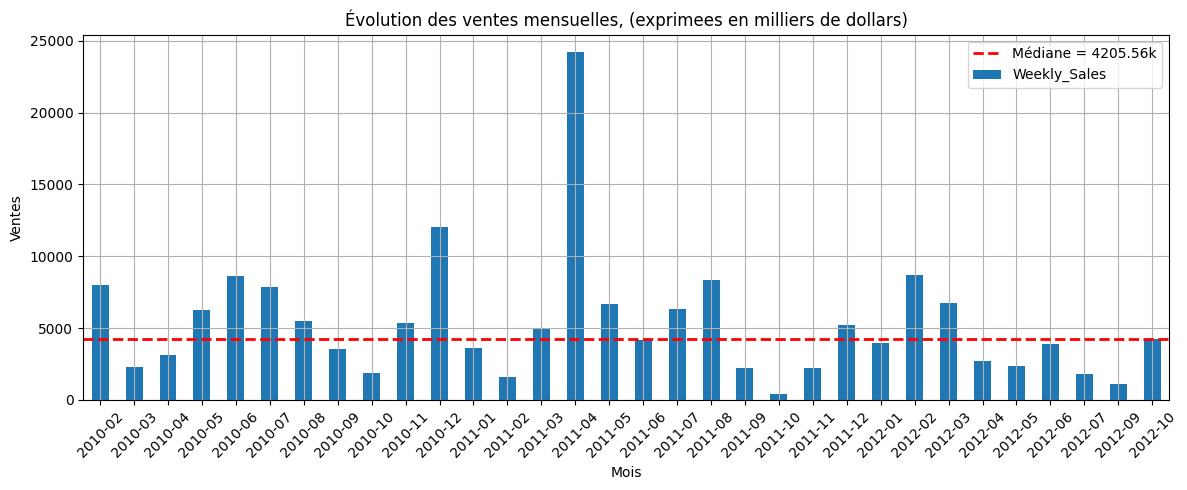

In [490]:
import matplotlib.pyplot as plt
# Mise en forme pour obtenir "2020-01", "2020-02", etc.
df['Month2'] = df['Date'].dt.to_period('M')

# Regrouper les ventes par mois (ou autre variable)
monthly_sales = df.groupby('Month2')['Weekly_Sales'].sum()

# Calcul de la médiane (en milliers de dollars)
median_sales = (monthly_sales / 1000).median()

# Tracer en barres
(monthly_sales/1000).plot(kind='bar', figsize=(12, 5))
plt.title("Évolution des ventes mensuelles, (exprimees en milliers de dollars)")
plt.ylabel("Ventes")
plt.xlabel("Mois")
plt.xticks(rotation=45)
plt.grid(True)

# Ajouter la ligne de la médiane
plt.axhline(y=median_sales, color='red', linestyle='--', linewidth=2, label=f'Médiane = {median_sales:.2f}k')
plt.legend()
plt.tight_layout()
plt.show()

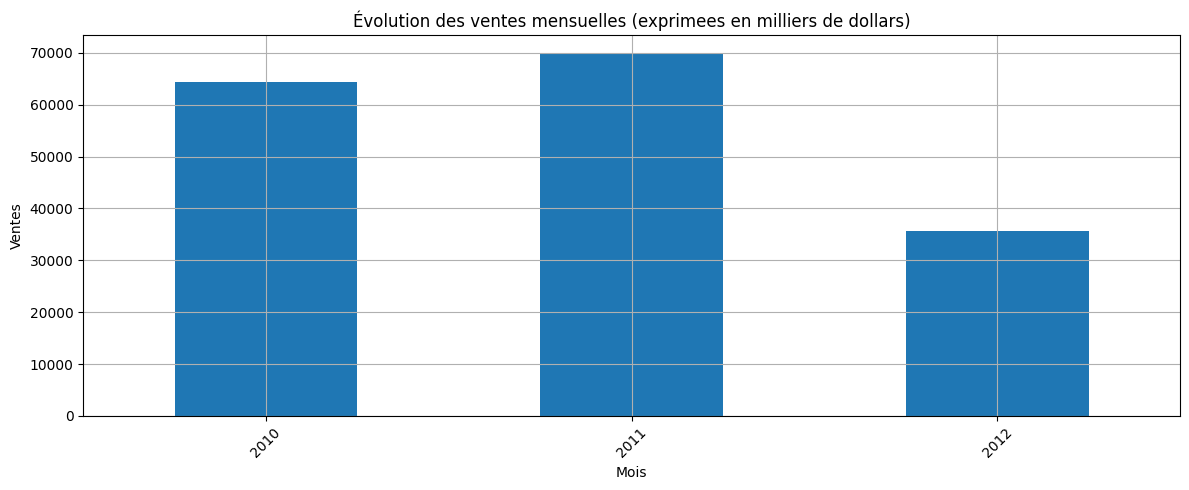

In [491]:
# Regrouper les ventes par mois (ou autre variable)
yearly_sales = df.groupby('Year')['Weekly_Sales'].sum()

# Tracer en barres
(yearly_sales/1000).plot(kind='bar', figsize=(12, 5))
plt.title("Évolution des ventes mensuelles (exprimees en milliers de dollars)")
plt.ylabel("Ventes")
plt.xlabel("Mois")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

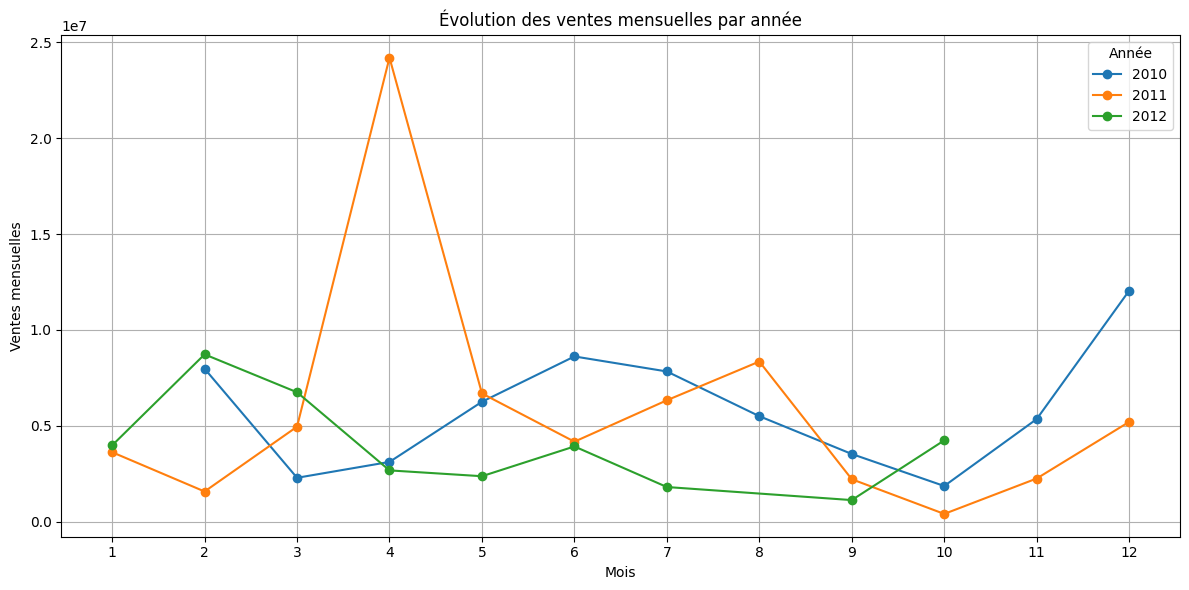

In [492]:
import matplotlib.pyplot as plt

# Formater en string et non periode
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

# Grouper les ventes par (Year, Month)
grouped = df.groupby(['Year', 'Month'])['Weekly_Sales'].sum().reset_index()

# Création du graphique
plt.figure(figsize=(12, 6))

# Boucler sur chaque année pour tracer une courbe
for year in sorted(grouped['Year'].unique()):
    monthly_sales = grouped[grouped['Year'] == year]
    plt.plot(monthly_sales['Month'], monthly_sales['Weekly_Sales'], marker='o', label=str(year))

# Personnalisation du graphique
plt.title("Évolution des ventes mensuelles par année")
plt.xlabel("Mois")
plt.ylabel("Ventes mensuelles")
plt.xticks(range(1, 13))
plt.legend(title="Année")
plt.grid(True)
plt.tight_layout()
plt.show()


Les ventes mensuelles sont en moyennes (medianes) de $6M, certains mois semblent montrer une saisonnalite comme:
- les mois de Novembre et mai, sur-contributeurs.
- les mois de Septembre et janvier, sous-contributeurs.
Par ailleurs, on constate des moindre performances au fil des annees.



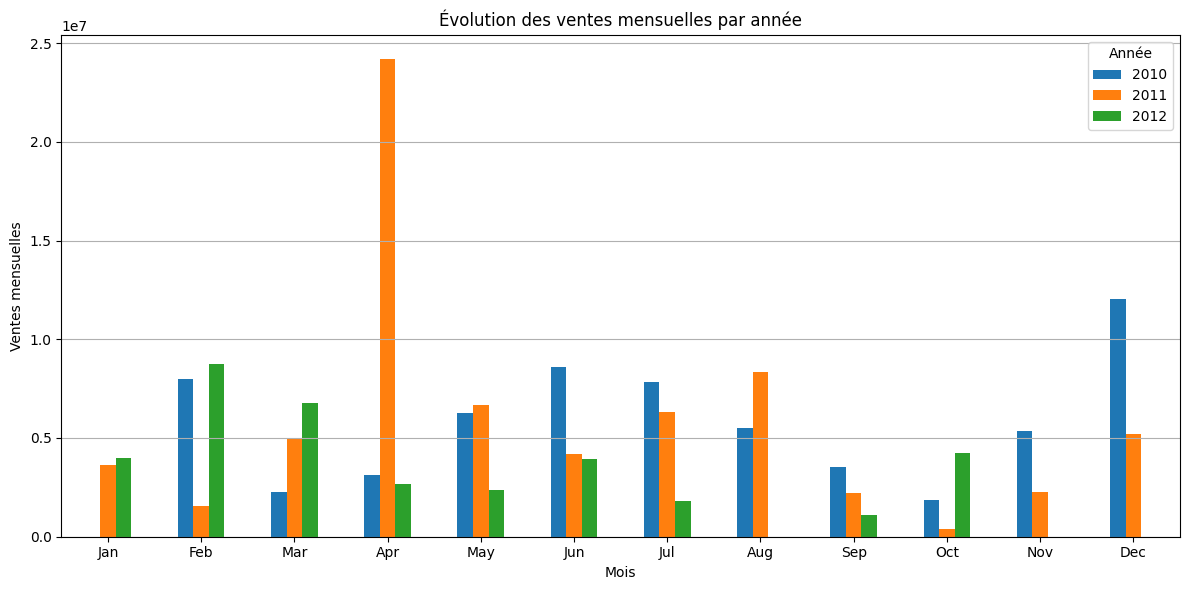

In [493]:
pivot_df = grouped.pivot(index='Month', columns='Year', values='Weekly_Sales')

# 5. Plot groupé
pivot_df.plot(kind='bar', figsize=(12, 6))

plt.title("Évolution des ventes mensuelles par année")
plt.xlabel("Mois")
plt.ylabel("Ventes mensuelles")
plt.xticks(ticks=range(0,12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                                      'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=0)
plt.legend(title="Année")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Peu significatif, les mois d'avril et septembre semblent toutefois etre les moins rentables

L'annee 2012 bien que globalement moins rentable, a connu un mois de fevrier, mars et octobre sur-contributeurs.

In [494]:
df['WeekdayName'].unique()
# impossible de comparer les ventes par jour de la semaine

array(['Friday'], dtype=object)

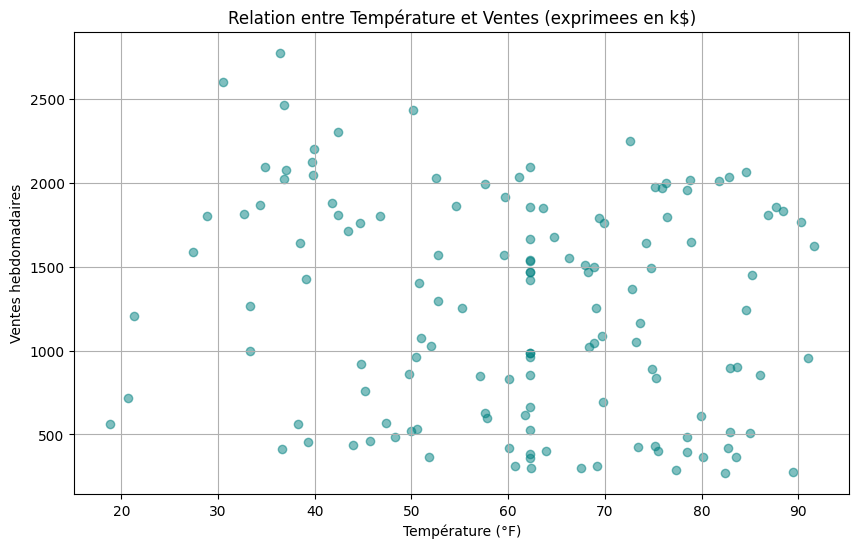

In [495]:
plt.figure(figsize=(10, 6))
df['Weekly_Sales2'] = df['Weekly_Sales']/1000
plt.scatter(df['Temperature'], df['Weekly_Sales2'], alpha=0.5, color='teal')
plt.title("Relation entre Température et Ventes (exprimees en k$)")
plt.xlabel("Température (°F)")
plt.ylabel("Ventes hebdomadaires")
plt.grid(True)
plt.show()

La temperature semble avoir un effet negatif sur les ventes

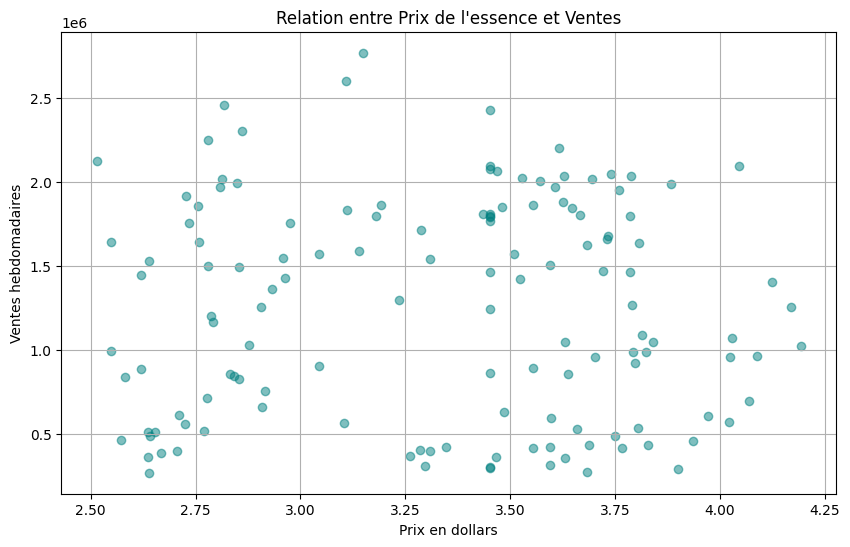

In [496]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Fuel_Price'], df['Weekly_Sales'], alpha=0.5, color='teal')
plt.title("Relation entre Prix de l'essence et Ventes")
plt.xlabel("Prix en dollars")
plt.ylabel("Ventes hebdomadaires")
plt.grid(True)
plt.show()

le prix de l'essence semble avoir un faible impact

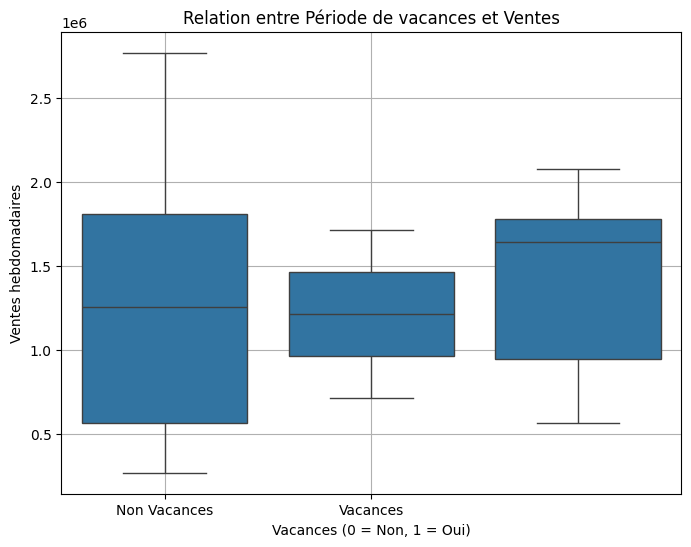

In [497]:
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.boxplot(x='Holiday_Flag', y='Weekly_Sales', data=df)
plt.title("Relation entre Période de vacances et Ventes")
plt.xlabel("Vacances (0 = Non, 1 = Oui)")
plt.ylabel("Ventes hebdomadaires")
plt.xticks([0, 1], ['Non Vacances', 'Vacances'])
plt.grid(True)
plt.show()

Les periodes de vacances (boxplot 2) est plus performant (puisque la médiane est plus haute).
Il est aussi plus stable (dispersion plus faible), ce qui peut être un signe de meilleure régularité.
**Le premier groupe, même s’il peut contenir des valeurs très élevées, est moins prévisible, cela peut amener des ruptures ou a l'inverse de la casse liee a de trop fortes commandes.**

# Entrainement des models

In [498]:
#!pip uninstall -y scikit-learn
#!pip install scikit-learn==1.3.2

In [499]:
import sklearn
print("Version de scikit-learn :", sklearn.__version__)


Version de scikit-learn : 1.6.1


In [500]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day,Weekday,WeekdayName,Month2,Weekly_Sales2
0,6.0,2011-02-18,1572117.54,1.0,59.61,3.045,214.777523,6.858,2011,2,18,4,Friday,2011-02,1572.11754
1,13.0,2011-03-25,1807545.43,0.0,42.38,3.435,128.616064,7.470,2011,3,25,4,Friday,2011-03,1807.54543
2,11.0,2011-04-29,1244390.03,0.0,84.57,3.451,214.556497,7.346,2011,4,29,4,Friday,2011-04,1244.39003
3,6.0,2010-05-28,1644470.66,0.0,78.89,2.759,212.412888,7.092,2010,5,28,4,Friday,2010-05,1644.47066
4,4.0,2010-05-28,1857533.70,0.0,62.25,2.756,126.160226,7.896,2010,5,28,4,Friday,2010-05,1857.53370


In [501]:
print("Nombre de Nan sur l'ensemble du dataset:")
print(df.isna().sum().sum())

Nombre de Nan sur l'ensemble du dataset:
0


In [502]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

# Préparation des features et cible
X = df[['Store','Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment',
        'Year', 'Month', 'Day', 'Weekday']]
y = df['Weekly_Sales']


# Séparer catégorielles et numériques
cat_features = ['Store', 'Holiday_Flag']
num_features = ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Year', 'Month', 'Day', 'Weekday']

# Préparation du pipeline de transformation
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore', drop='first'), cat_features),
        ('num', StandardScaler(), num_features)
    ])

# Pipeline complet : préprocessing + modèle
pipeline_lr = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Split train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [503]:
# Entraînement Model Regression Lineaire
print("Modele de regression Lineaire....")
pipeline_lr.fit(X_train, y_train)

# Prédictions
y_train_pred = pipeline_lr.predict(X_train)
y_pred = pipeline_lr.predict(X_test)

# Évaluation
rmse_train = mean_squared_error(y_train, y_train_pred)**0.5
r2_train = r2_score(y_train, y_train_pred)
rmse_test = mean_squared_error(y_test, y_pred)**0.5
r2_test = r2_score(y_test, y_pred)

print("Performance sur l'entraînement :")
print(f"  RMSE: {rmse_train:.2f}")
print(f"  R2: {r2_train:.2f}")

print("Performance sur le test :")
print(f"  RMSE: {rmse_test:.2f}")
print(f"  R2: {r2_test:.2f}")

Modele de regression Lineaire....
Performance sur l'entraînement :
  RMSE: 106744.36
  R2: 0.97
Performance sur le test :
  RMSE: 171178.97
  R2: 0.93


Le R² (0.97) montre que le modele apprend bien sur le jeu d'entrainement. Le modele arrive a tres bien generalise (0.93)
Toutefois, les performances élevées cachent un risque : le modèle dépend fortement du magasin.

# Features importance

  Importance des variables:


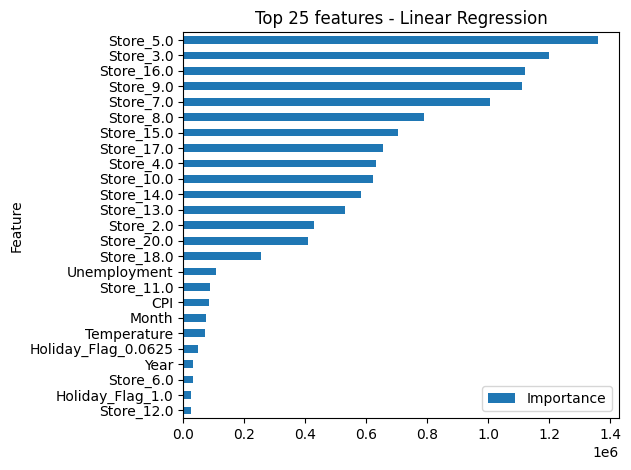

In [504]:
# Features importance...
import numpy as np

# Importance des variables
print(f"  Importance des variables:")

# Récupérer les noms des colonnes après transformation
ohe = pipeline_lr.named_steps['preprocessor'].named_transformers_['cat']
cat_feature_names = ohe.get_feature_names_out(cat_features)
all_feature_names = np.concatenate([cat_feature_names, num_features])


coeffs = pipeline_lr.named_steps['regressor'].coef_
coef_df = pd.DataFrame({'Feature': all_feature_names, 'Importance': np.abs(coeffs)})

# Affichage trié
coef_df = coef_df.sort_values(by='Importance', ascending=False)

# Visualisation
coef_df.head(25).plot(kind='barh', x='Feature', y='Importance', title=f"Top 25 features - Linear Regression")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

Analyse: Le profil des points de ventes explique en grande partie les resultats hebdmodaires, puis le CPI et l'absence de salaries

Puisque la prediction depend essentiellement des magasins, je choisis de **stratifier mon split pour assurer une repartition equilibre des magasins entre train et test set.**

In [505]:
# Appliquer une stratification sur :"Store" pour l'equilibre du dataset:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=df['Store'], random_state=0)



In [506]:
# Entraînement Model Regression Lineaire
print("Modele de regression Lineaire....")
pipeline_lr.fit(X_train, y_train)

# Prédictions
y_train_pred = pipeline_lr.predict(X_train)
y_pred = pipeline_lr.predict(X_test)

# Évaluation
rmse_train = mean_squared_error(y_train, y_train_pred) **0.5
r2_train = r2_score(y_train, y_train_pred)
rmse_test = mean_squared_error(y_test, y_pred) **0.5
r2_test = r2_score(y_test, y_pred)

print("Performance sur l'entraînement :")
print(f"  RMSE: {rmse_train:.2f}")
print(f"  R2: {r2_train:.2f}")

print("Performance sur le test :")
print(f"  RMSE: {rmse_test:.2f}")
print(f"  R2: {r2_test:.2f}")

Modele de regression Lineaire....
Performance sur l'entraînement :
  RMSE: 108978.48
  R2: 0.97
Performance sur le test :
  RMSE: 136777.52
  R2: 0.96


Un meilleur equilibre entre le train et le test a permis d'ameliorer le RMSE du modele de regression lineaire.

# Entrainement de diffents modeles

In [507]:
# == Boucle d'entrainement des differents models ==
# Imports
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_validate, cross_val_score

# Supprimer les warnings liés aux catégories inconnues dans le preprocessor
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings(
    "ignore",
    message="Found unknown categories in columns .* during transform. These unknown categories will be encoded as all zeros"
)

# Supprimer les warnings de convergence (ex: pour Lasso)
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Definition des models
models = [('Lasso', Lasso(alpha=0.1, random_state=42, max_iter=20000)),
          ('Ridge', Ridge(alpha=0.05)),
          ('Random Forest', RandomForestRegressor(n_estimators=100, random_state=42)),
          ('XGBoost', XGBRegressor(n_estimators = 100, random_state = 42))]

# Boucle d'entrainement
for name, model in models:
    print(f"Entraînement du modèle: {name}")
    pipeline_models = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])

    # Cross-validation R²
    scoring = ['neg_mean_squared_error', 'r2']
    scores = cross_validate(pipeline_models, X_train, y_train, cv=5, scoring=scoring, n_jobs=-1)

    rmse_scores = np.sqrt(-scores['test_neg_mean_squared_error'])
    r2_scores = scores['test_r2']

    mean_rmse = np.mean(rmse_scores)
    mean_r2 = np.mean(r2_scores)

    print(f" RMSE (moyenne sur 5 folds): {mean_rmse:.0f}")
    print(f" R² (moyenne sur 5 folds):   {mean_r2:.2f}")
    print("")

Entraînement du modèle: Lasso
 RMSE (moyenne sur 5 folds): 165794
 R² (moyenne sur 5 folds):   0.93

Entraînement du modèle: Ridge
 RMSE (moyenne sur 5 folds): 164970
 R² (moyenne sur 5 folds):   0.93

Entraînement du modèle: Random Forest
 RMSE (moyenne sur 5 folds): 366699
 R² (moyenne sur 5 folds):   0.64

Entraînement du modèle: XGBoost
 RMSE (moyenne sur 5 folds): 302423
 R² (moyenne sur 5 folds):   0.75



Les diffents modeles sont pour le moment moins performants que la regression linéaire. Le parametrage de certains hyperparametres peuvent ameliorer ces performances.
Par ailleurs, Le model XGBoost et Random Forest ne sont pas adaptés à la prediction de ces données.
XGBoost et Random Forest sont des modèles basés sur des arbres aléatoires.
Ici les relations sont lineaires donc c'est tout a fait logique.|

## Amelioration des models via GridSearchCV

### ... pour Ridge

In [508]:
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings(
    "ignore",
    message="Found unknown categories in columns .* during transform. These unknown categories will be encoded as all zeros"
)

# ==== Optimisation de Ridge avec Alpha = ? =====
from sklearn.model_selection import GridSearchCV

# Redéfinir le pipeline avec Ridge
ridge_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Ridge())
])

# Grille des valeurs à tester pour alpha
param_grid_ridge = {
    'regressor__alpha': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.025, 0.04, 0.05, 0.06, 0.075, 0.1, 0.12, 0.15, 0.2]
}

grid_ridge = GridSearchCV(
    ridge_pipeline,
    param_grid_ridge,
    scoring='r2',
    cv=5,
    n_jobs=-1
)

# Entraînement
grid_ridge.fit(X_train, y_train)

# Résultats de la recherche
best_alpha = grid_ridge.best_params_['regressor__alpha']
best_score = grid_ridge.best_score_

print(f"\nMeilleur alpha Ridge trouvé : {best_alpha}")
print(f"Meilleur R² moyen en validation croisée (GridSearchCV) : {best_score:.4f}")

# Validation croisée 10 folds sur le meilleur modèle (pour confirmation)
print("\nValidation croisée 5 folds avec le meilleur modèle Ridge...")
best_model = grid_ridge.best_estimator_
cv_scores = cross_val_score(best_model, X_train, y_train, cv=10, scoring='r2')
print(f"R² moyen (CV 5 folds) du meilleur modèle Ridge : {cv_scores.mean():.3f}")

# Évaluation finale sur jeu de test
print("\nÉvaluation finale sur le jeu de test:")
y_pred_test = best_model.predict(X_test)
r2_test = r2_score(y_test, y_pred_test)
rmse_test = mean_squared_error(y_test, y_pred_test) **0.5
print(f"R² sur test : {r2_test:.3f}")
print(f"RMSE sur test : {rmse_test:.0f}")


Meilleur alpha Ridge trouvé : 0.04
Meilleur R² moyen en validation croisée (GridSearchCV) : 0.9281

Validation croisée 5 folds avec le meilleur modèle Ridge...
R² moyen (CV 5 folds) du meilleur modèle Ridge : 0.925

Évaluation finale sur le jeu de test:
R² sur test : 0.959
RMSE sur test : 137108


Le modèle Ridge, avec un alpha optimal de 0.04, obtient un excellent compromis entre biais et variance. Le R² sur le test de 0.959 et le RMSE de 137 108 montrent que le modèle généralise très bien.

### ... pour Lasso

In [509]:
# ==== Optimisation de Lasso avec alpha = ? ====
# Redéfinir le pipeline avec Lasso
lasso_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Lasso())
])

# Grille des alphas à tester
param_grid_lasso = {
    'regressor__alpha': [ 0.1, 0.5, 1, 5, 10, 50, 100, 200, 500, 800, 1000, 1200]
}

grid_lasso = GridSearchCV(
    lasso_pipeline,
    param_grid_lasso,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=1
)

# Entraînement
grid_lasso.fit(X_train, y_train)

# Résultats
best_model = grid_lasso.best_estimator_  # Récupère le meilleur modèle trouvé
best_alpha = grid_lasso.best_params_['regressor__alpha']  # Récupère le meilleur alpha
best_score = grid_lasso.best_score_  # Récupère le meilleur score R² (cross-validation)

# Affichage des résultats
print(f"Meilleur alpha : {best_alpha}")
y_pred_train = best_model.predict(X_train)
r2_train = r2_score(y_train, y_pred_train)
print(f"R² sur le train : {r2_train:.3f}")
print("")
print("Début de la recherche avec validation croisée (GridSearchCV, cv = 5) pour Lasso...")
print(f"Meilleur score R² (cross-validation) : {best_score:.3f}")

# Évaluation sur test avec meilleur modèle
y_pred_test = best_model.predict(X_test)
r2_test = r2_score(y_test, y_pred_test)
rmse_test = mean_squared_error(y_test, y_pred_test) **0.5
r2_moyen = cross_val_score(best_model, X_train, y_train, cv=10, scoring='r2').mean()

print(f"R² moyen (CV Lasso optimisé) : {r2_moyen:.3f}")
print(f"Performance sur le test : R² = {r2_test:.3f} | RMSE = {rmse_test:.0f}")

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Meilleur alpha : 800
R² sur le train : 0.969

Début de la recherche avec validation croisée (GridSearchCV, cv = 5) pour Lasso...
Meilleur score R² (cross-validation) : 0.932
R² moyen (CV Lasso optimisé) : 0.933
Performance sur le test : R² = 0.957 | RMSE = 140239


Le modèle Lasso, avec un alpha optimal de 800, réussit à conserver une très bonne performance tout en réduisant la dépendance excessive aux magasins. Le R² sur le test de 0.957 et le RMSE de 140 239 montrent que le modèle généralise bien, avec un léger compromis entre régularisation et précision.

# Compilation des performances sous differents régulateurs

In [510]:
best_ridge = grid_ridge.best_estimator_
best_lasso = grid_lasso.best_estimator_


models = {
    'Linear Regression': Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', LinearRegression())
    ]),
    'Ridge': best_ridge,
    'Lasso': best_lasso,
    }


results = []

for name, pipe in models.items():
    pipe.fit(X_train, y_train)
    y_train_pred = pipe.predict(X_train)
    y_test_pred = pipe.predict(X_test)

    results.append({
        'Modèle': name,
        'R² Train': r2_score(y_train, y_train_pred),
        'RMSE Train': mean_squared_error(y_train, y_train_pred) **0.5,
        'R² Test': r2_score(y_test, y_test_pred),
        'RMSE Test': mean_squared_error(y_test, y_test_pred) **0.5
    })

results_df = pd.DataFrame(results).sort_values(by='R² Test', ascending=False)
results_df['R² Train'] = results_df['R² Train'].round(3)
results_df['R² Test'] = results_df['R² Test'].round(3)
results_df['RMSE Train'] = results_df['RMSE Train'].round(0).astype(int)
results_df['RMSE Test'] = results_df['RMSE Test'].round(0).astype(int)

print(results_df)


              Modèle  R² Train  RMSE Train  R² Test  RMSE Test
0  Linear Regression     0.971      108978    0.959     136778
1              Ridge     0.970      109506    0.959     137108
2              Lasso     0.969      111927    0.957     140239


### Impact des régularisateurs
Ridge réduit légèrement le RMSE train mais le R² test est identique à la régression linéaire.

Lasso a un RMSE un peu plus élevé et R² légèrement plus bas → Lasso commence à “écraser” certains coefficients.
Avec un dataset petit et des relations linéaires claires, Lasso n’apporte pas d’avantage ici.

## Conclusion pratique
Linear Regression est très solide ici, pas besoin de régularisation.
Ridge pourrait être utilisé si on souhaite un modèle plus stable avec un petit risque de colinéarité, mais l’impact est faible.

In [513]:
# Prédictions sur test avec Linear Regression
y_test_pred = pipeline_lr.predict(X_test)

# Calcul RMSE sur test
rmse_test = mean_squared_error(y_test, y_test_pred) **0.5

# Moyenne et écart-type des ventes (test)
mean_sales = y_test.mean()
std_sales = y_test.std()

print(f"Moyenne des ventes hebdomadaires (test) : {mean_sales:,.2f}")
print(f"Écart-type des ventes hebdomadaires (test) : {std_sales:,.2f}")

# RMSE relatif
rmse_pct_mean = (rmse_test / mean_sales) * 100
rmse_pct_std = (rmse_test / std_sales) * 100

print(f"RMSE = {rmse_test:,.2f}")
print(f"RMSE représente {rmse_pct_mean:.2f}% de la moyenne des ventes")
print(f"RMSE représente {rmse_pct_std:.2f}% de l'écart-type des ventes")

Moyenne des ventes hebdomadaires (test) : 1,251,057.48
Écart-type des ventes hebdomadaires (test) : 689,429.95
RMSE = 136,777.52
RMSE représente 10.93% de la moyenne des ventes
RMSE représente 19.84% de l'écart-type des ventes


**Interprétation du RMSE pour le modèle de régression linéaire :**

- Le RMSE sur le jeu de test est de **136 778**, ce qui représente environ **11 % de la moyenne des ventes hebdomadaires** et **20 % de leur écart-type**.
- Cela indique que le modèle prédit les ventes avec une **erreur modérée**, correcte par rapport aux variations observées entre magasins et semaines.
- Les écarts plus importants peuvent se produire pour certains magasins ou semaines atypiques, mais globalement le modèle est stable.
